In [421]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [422]:
Feb5 = pd.read_csv('/Users/sa2/Downloads/archive/csv-daily-data-20230612T101401Z-001/csv-daily-data/2023-02-05.csv')
Feb6 = pd.read_csv('/Users/sa2/Downloads/archive/csv-daily-data-20230612T101401Z-001/csv-daily-data/2023-02-06.csv')
Feb7 = pd.read_csv('/Users/sa2/Downloads/archive/csv-daily-data-20230612T101401Z-001/csv-daily-data/2023-02-07.csv')
Feb8 = pd.read_csv('/Users/sa2/Downloads/archive/csv-daily-data-20230612T101401Z-001/csv-daily-data/2023-02-08.csv')
Feb9 = pd.read_csv('/Users/sa2/Downloads/archive/csv-daily-data-20230612T101401Z-001/csv-daily-data/2023-02-09.csv')
Feb10 = pd.read_csv('/Users/sa2/Downloads/archive/csv-daily-data-20230612T101401Z-001/csv-daily-data/2023-02-10.csv')
Feb11 = pd.read_csv('/Users/sa2/Downloads/archive/csv-daily-data-20230612T101401Z-001/csv-daily-data/2023-02-11.csv')
Feb12 = pd.read_csv('/Users/sa2/Downloads/archive/csv-daily-data-20230612T101401Z-001/csv-daily-data/2023-02-12.csv')

In [423]:
dfnum = Feb11.select_dtypes(include=['int64', 'float64'])

In [424]:
dfnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92440 entries, 0 to 92439
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Src Port                    92440 non-null  int64  
 1   Dst Port                    92440 non-null  int64  
 2   Protocol                    92440 non-null  int64  
 3   Flow Duration               92440 non-null  int64  
 4   Total Fwd Packet            92440 non-null  int64  
 5   Total Bwd packets           92440 non-null  int64  
 6   Total Length of Fwd Packet  92440 non-null  float64
 7   Total Length of Bwd Packet  92440 non-null  float64
 8   Fwd Packet Length Max       92440 non-null  float64
 9   Fwd Packet Length Min       92440 non-null  float64
 10  Fwd Packet Length Mean      92440 non-null  float64
 11  Fwd Packet Length Std       92440 non-null  float64
 12  Bwd Packet Length Max       92440 non-null  float64
 13  Bwd Packet Length Min       924

In [425]:
strong_corr = (dfnum.corr().abs() >= 0.7) & (dfnum.corr().abs() < 1.0) 

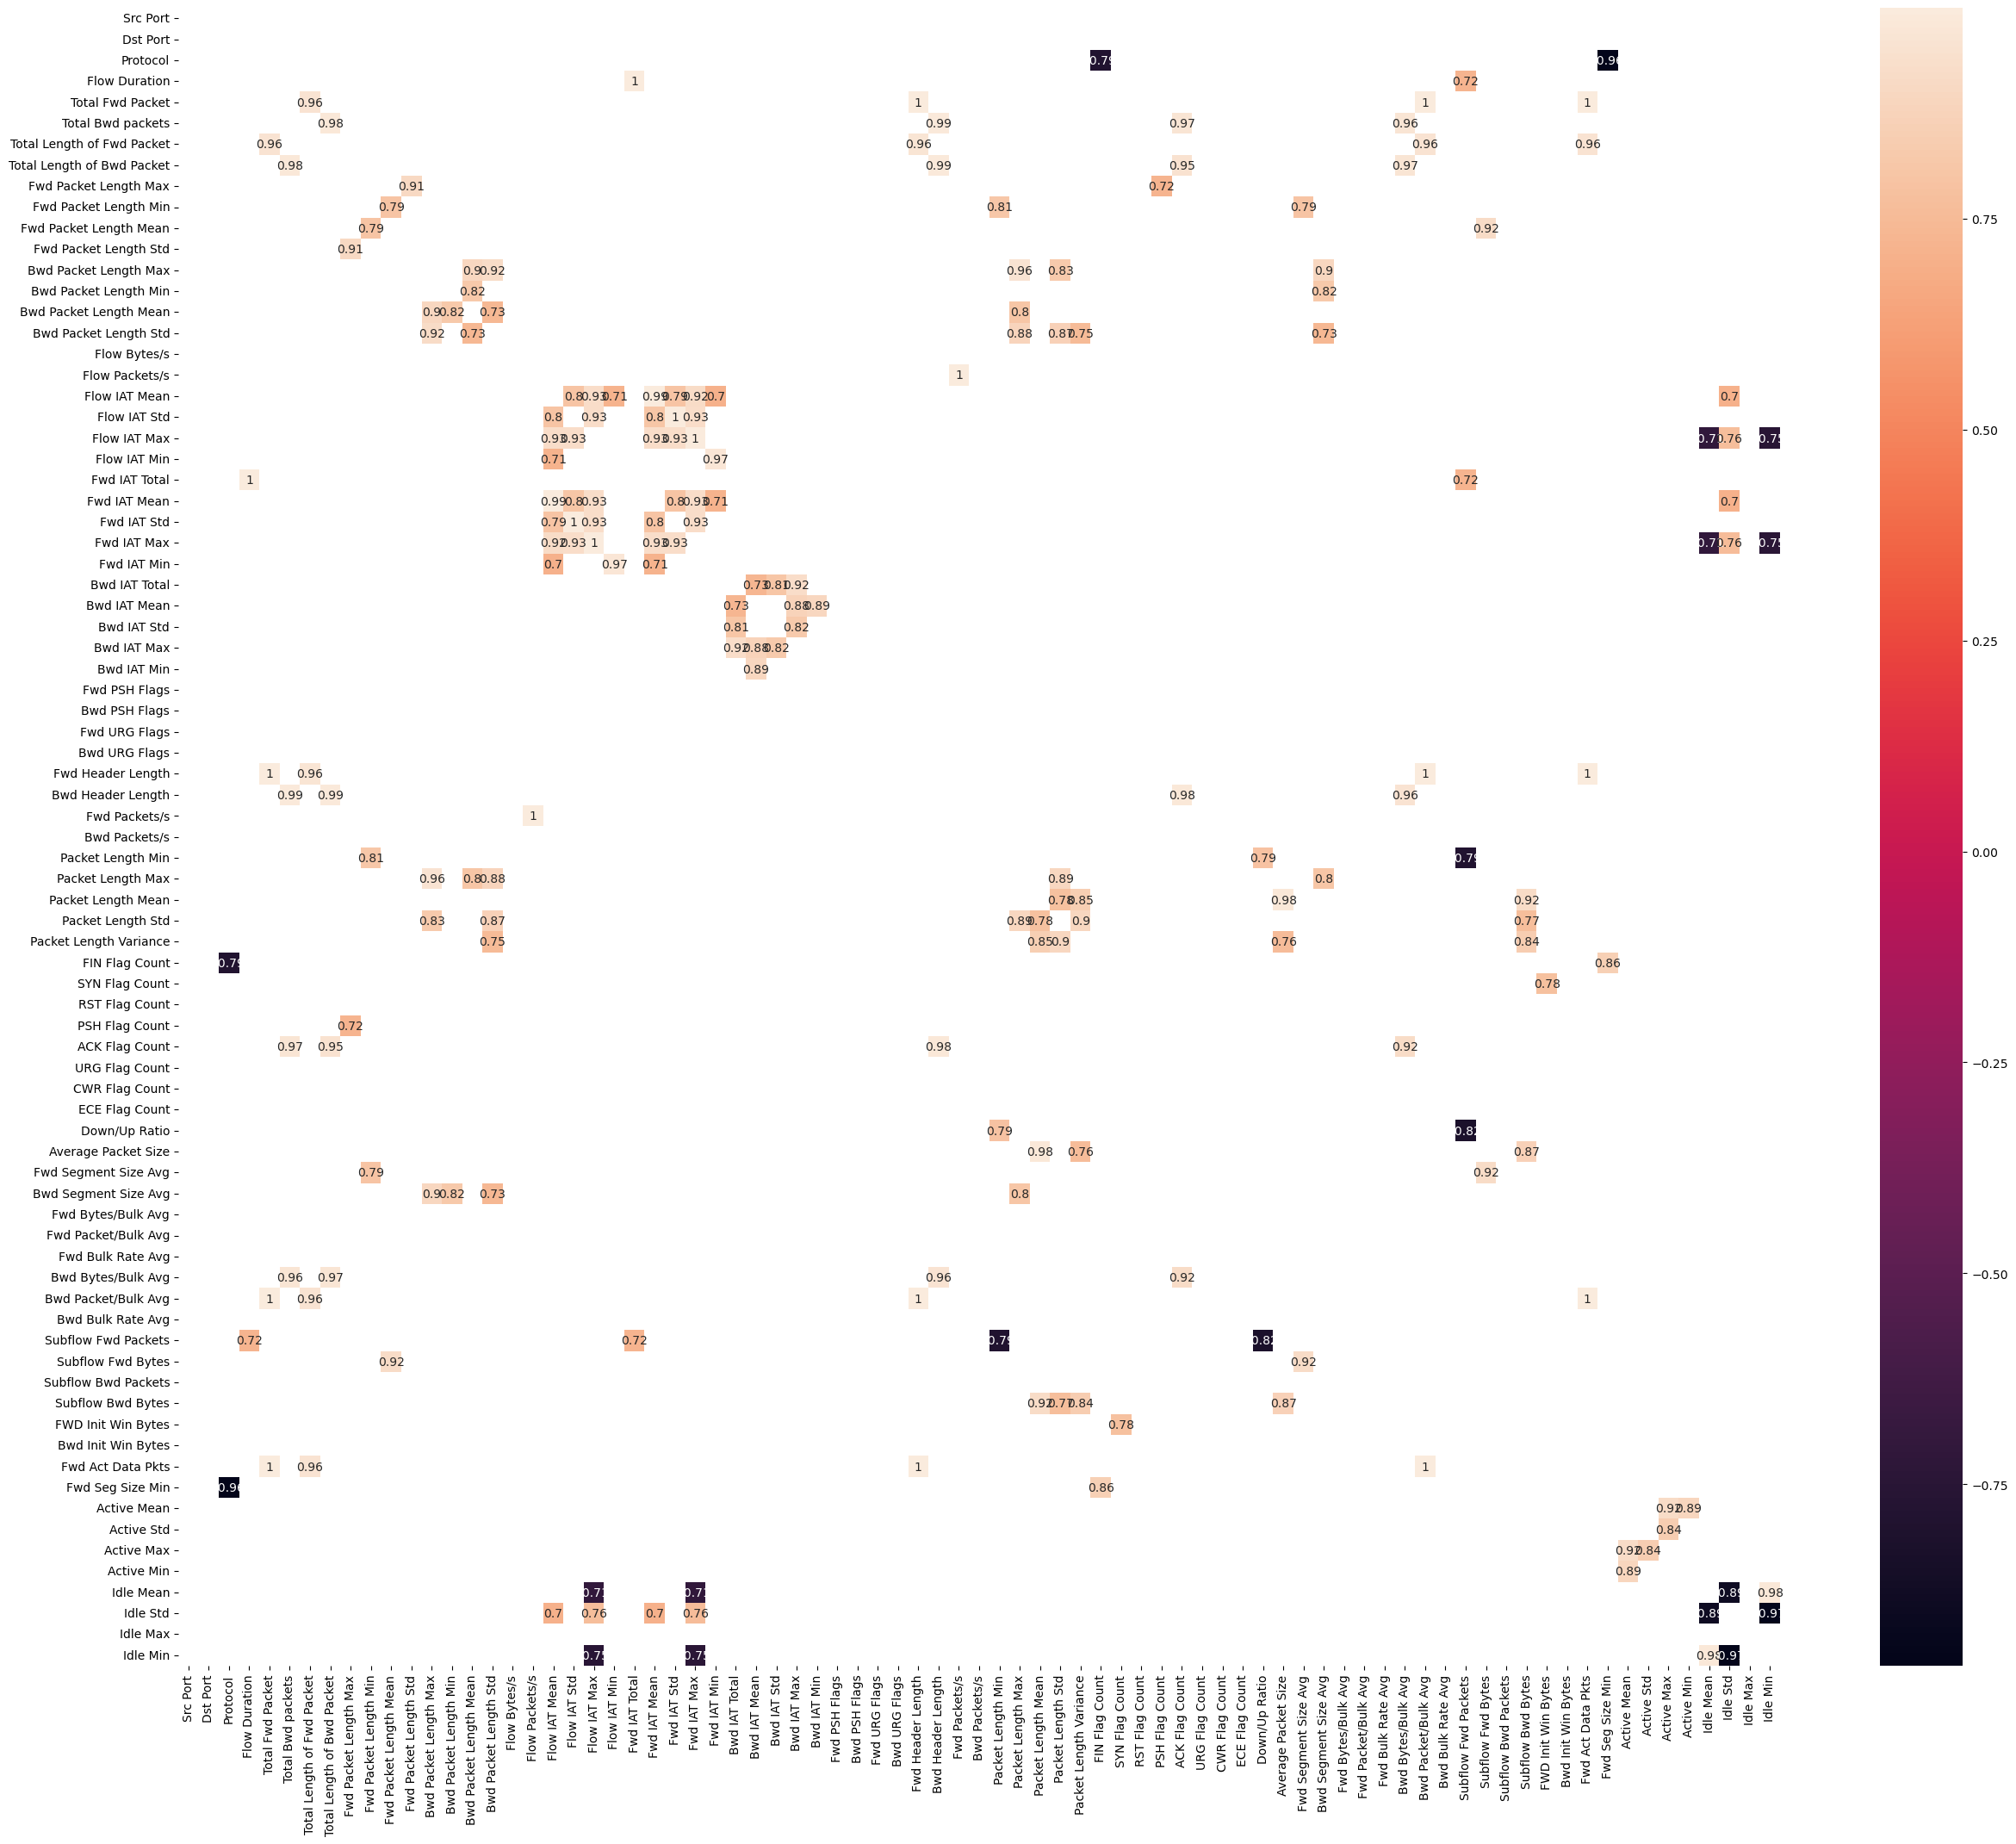

In [426]:
plt.figure(figsize=(30, 25))
sns.heatmap(dfnum.corr().where(strong_corr), annot=True)
plt.show()

postive and negative strong correlations (.7), excluding perfect ones

In [427]:
# where keeps strong values, stack to get pairs
strong_pairs = dfnum.corr().where(strong_corr).stack().reset_index()

# rename
strong_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# remove duplicate pairs 
strong_pairs = strong_pairs[strong_pairs['Feature1'] < strong_pairs['Feature2']]

print(strong_pairs.to_string())

                   Feature1                    Feature2  Correlation
2             Flow Duration               Fwd IAT Total     0.999609
3             Flow Duration         Subflow Fwd Packets     0.716577
4          Total Fwd Packet  Total Length of Fwd Packet     0.960538
8         Total Bwd packets  Total Length of Bwd Packet     0.979986
20    Fwd Packet Length Max       Fwd Packet Length Std     0.905222
21    Fwd Packet Length Max              PSH Flag Count     0.718932
23    Fwd Packet Length Min           Packet Length Min     0.808335
24    Fwd Packet Length Min        Fwd Segment Size Avg     0.793025
25   Fwd Packet Length Mean       Fwd Packet Length Min     0.793025
26   Fwd Packet Length Mean           Subflow Fwd Bytes     0.920222
28    Bwd Packet Length Max      Bwd Packet Length Mean     0.895517
29    Bwd Packet Length Max       Bwd Packet Length Std     0.917244
30    Bwd Packet Length Max           Packet Length Max     0.955145
31    Bwd Packet Length Max       

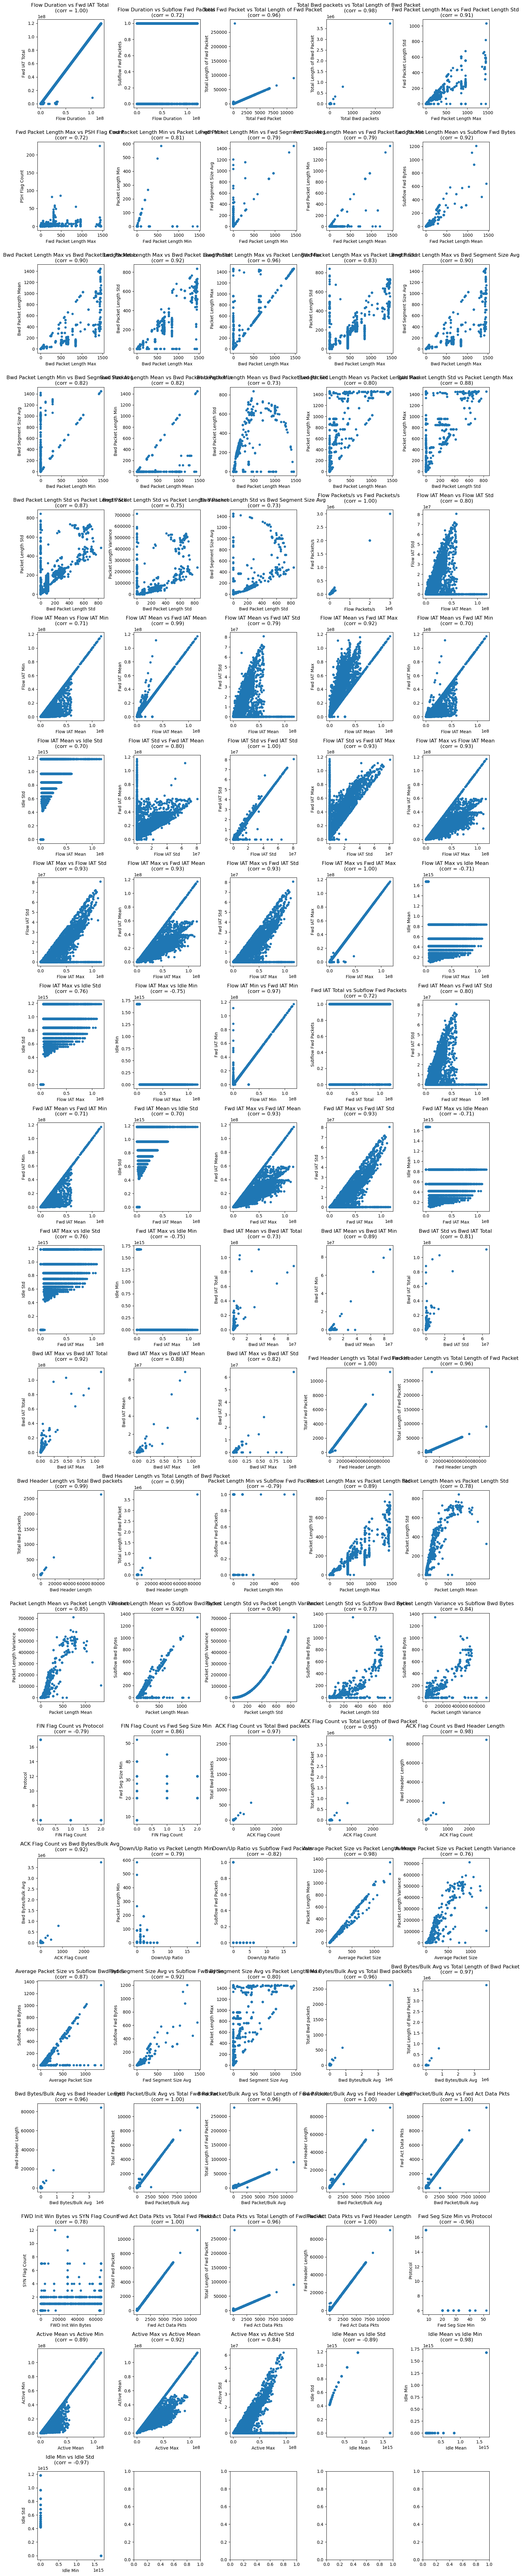

In [428]:
# grid dimensions
rows = (102 + 5 - 1) // 5 

# subplots
fig, axes = plt.subplots(rows, 5, figsize=(16, 4 * rows))
axes = axes.flatten()

# scatter plot
for i, row in enumerate(strong_pairs.itertuples()):
    feature1 = row.Feature1
    feature2 = row.Feature2
    corr = row.Correlation

    dfnum.plot(kind='scatter', x=feature1, y=feature2, ax=axes[i])
    axes[i].set_title(f'{feature1} vs {feature2} \n (corr = {corr:.2f})')
    axes[i].set_xlabel(feature1)
    axes[i].set_ylabel(feature2)

plt.tight_layout()
plt.show()

Linear Relationships: Many features show strong linear correlations, particularly among timing variables, volume metrics, and packet count
&emsp;

Non-linear Relationships: Some timing and variance features display exponential or logarithmic curves
&ensp;

Categorical Variables: Protocol and flag counts create groups, showing discrete rather than continuous distributions
&ensp;

Continuous Variables: most show continuous distributions with varying degrees of clustering and spread.

&nbsp;

similar behaviors through different measurements (redundancy)
- packet counts and byte totals, volume 
- forward and backward, directionality 
- various inter-arrival time statistics, timing

In [429]:
strong_cols = dfnum[['Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk Avg', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes', 'FWD Init Win Bytes', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Min']]
strong_cols.info()
# columns involved in strong correlations 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92440 entries, 0 to 92439
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Protocol                    92440 non-null  int64  
 1   Flow Duration               92440 non-null  int64  
 2   Total Fwd Packet            92440 non-null  int64  
 3   Total Bwd packets           92440 non-null  int64  
 4   Total Length of Fwd Packet  92440 non-null  float64
 5   Total Length of Bwd Packet  92440 non-null  float64
 6   Fwd Packet Length Max       92440 non-null  float64
 7   Fwd Packet Length Min       92440 non-null  float64
 8   Fwd Packet Length Mean      92440 non-null  float64
 9   Fwd Packet Length Std       92440 non-null  float64
 10  Bwd Packet Length Max       92440 non-null  float64
 11  Bwd Packet Length Min       92440 non-null  float64
 12  Bwd Packet Length Mean      92440 non-null  float64
 13  Bwd Packet Length Std       924

In [430]:
stronger_cols = (strong_cols.corr().abs() >= 0.9) 
stronger_cols = strong_cols.corr().where(stronger_cols).stack().reset_index()
stronger_cols.columns = ['Feature1', 'Feature2', 'Correlation']
stronger_cols = stronger_cols[stronger_cols['Feature1'] < stronger_cols['Feature2']]
print(stronger_cols.to_string())
# looking at columns that teeter on perfect corrlation


                   Feature1                    Feature2  Correlation
3             Flow Duration               Fwd IAT Total     0.999609
5          Total Fwd Packet  Total Length of Fwd Packet     0.960538
10        Total Bwd packets  Total Length of Bwd Packet     0.979986
25    Fwd Packet Length Max       Fwd Packet Length Std     0.905222
28   Fwd Packet Length Mean        Fwd Segment Size Avg     1.000000
29   Fwd Packet Length Mean           Subflow Fwd Bytes     0.920222
33    Bwd Packet Length Max       Bwd Packet Length Std     0.917244
34    Bwd Packet Length Max           Packet Length Max     0.955145
37   Bwd Packet Length Mean        Bwd Segment Size Avg     1.000000
41           Flow Packets/s               Fwd Packets/s     0.995443
44            Flow IAT Mean                Fwd IAT Mean     0.992691
45            Flow IAT Mean                 Fwd IAT Max     0.921983
48             Flow IAT Std                 Fwd IAT Std     0.996579
49             Flow IAT Std       

High Correlation Clusters:
- Flow Duration vs Fwd IAT Total (0.9996) - Drop: Fwd IAT Total
- Total Fwd Packet vs Fwd Header Length (0.9999) - Drop: Fwd Header Length
- Total Fwd Packet vs Fwd Act Data Pkts (0.9999) - Drop: Fwd Act Data Pkts
- Total Fwd Packet vs Bwd Packet/Bulk Avg (0.9979) - Drop: Bwd Packet/Bulk Avg
- Flow Packets/s vs Fwd Packets/s (0.9954) - Drop: Fwd Packets/s
- Flow IAT Std vs Fwd IAT Std (0.9966) - Drop: Fwd IAT Std
- Flow IAT Max vs Fwd IAT Max (0.9981) - Drop: Fwd IAT Max
- Flow IAT Min vs Fwd IAT Min (0.9715) - Drop: Fwd IAT Min
- Bwd Header Length vs Total Bwd packets (0.9891) - Drop: Bwd Header Length
- Average Packet Size vs Packet Length Mean (0.9820) - Drop: Average Packet Size

&nbsp;

Statistical Redundancy:
- Fwd Packet Length Stats - Keep: Fwd Packet Length Mean, Fwd Packet Length Std Drop: Fwd Packet Length Min, Fwd Packet Length Max
- Bwd Packet Length Stats - Keep: Bwd Packet Length Mean, Bwd Packet Length Std Drop: Bwd Packet Length Min, Bwd Packet Length Max,
- Packet Length Stats - Drop: Packet Length Mean, Packet Length Std, Packet Length Min, Packet Length Max
- IAT Stats - Keep: Flow IAT Mean, Drop: Fwd IAT Mean, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min, Bwd IAT Total
- Active Stats - Keep: Active Mean, Drop: Active Max, Active Std, Active Min 
- Idle Stats - Keep: Idle Mean, Drop: Idle Std, Idle Min (correlation -0.97)

&nbsp;

Other Redundant Features:
- Segment Size Averages - Drop: Fwd Segment Size Avg, Bwd Segment Size Avg (highly correlated with length means)
- Bulk Averages - Drop: Bwd Bytes/Bulk Avg (correlated with packet counts)
- Variance - Drop: Packet Length Variance (redundant with std)
- Subflow Packets - Drop: Subflow Fwd Packets (correlated with flow duration)

&nbsp;
The features that remain have variety but is manageable:
&emsp;

- Traffic Volume: Total packets/bytes in both directions
- Timing Patterns: Flow IAT statistics capture temporal behavior
- Protocol Behavior: Flag counts and protocol type
- Flow Characteristics: Duration, packet rates, segment sizes
- Directional Balance: Down/Up ratio, subflow bytes

In [431]:
strong_cols_reduced = strong_cols.drop(columns=['Fwd IAT Total','Fwd Header Length','Fwd Act Data Pkts','Bwd Packet/Bulk Avg','Fwd Packets/s','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd Header Length','Average Packet Size', 'Fwd Packet Length Min','Bwd Packet Length Min','Packet Length Mean','Packet Length Std','Packet Length Min','Fwd IAT Mean','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Active Max','Active Std','Idle Std','Idle Min','Fwd Segment Size Avg','Bwd Segment Size Avg','Bwd Bytes/Bulk Avg','Packet Length Variance','Subflow Fwd Packets', 'Active Min', 'Packet Length Max', 'Bwd IAT Total', 'Bwd Packet Length Max', 'Fwd Packet Length Max'])
strong_cols_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92440 entries, 0 to 92439
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Protocol                    92440 non-null  int64  
 1   Flow Duration               92440 non-null  int64  
 2   Total Fwd Packet            92440 non-null  int64  
 3   Total Bwd packets           92440 non-null  int64  
 4   Total Length of Fwd Packet  92440 non-null  float64
 5   Total Length of Bwd Packet  92440 non-null  float64
 6   Fwd Packet Length Mean      92440 non-null  float64
 7   Fwd Packet Length Std       92440 non-null  float64
 8   Bwd Packet Length Mean      92440 non-null  float64
 9   Bwd Packet Length Std       92440 non-null  float64
 10  Flow Packets/s              92440 non-null  float64
 11  Flow IAT Mean               92440 non-null  float64
 12  Flow IAT Std                92440 non-null  float64
 13  Flow IAT Max                924

In [432]:
strong_corr = (strong_cols_reduced.corr().abs() >= 0.7) & (strong_cols_reduced.corr().abs() < 1.0) 

strong_cols_reduced = strong_cols_reduced.corr().where(strong_corr).stack().reset_index()

strong_cols_reduced.columns = ['Feature1', 'Feature2', 'Correlation']

strong_cols_reduced = strong_cols_reduced[strong_cols_reduced['Feature1'] < strong_cols_reduced['Feature2']]

print(strong_cols_reduced.to_string())

                  Feature1                    Feature2  Correlation
2         Total Fwd Packet  Total Length of Fwd Packet     0.960538
3        Total Bwd packets  Total Length of Bwd Packet     0.979986
8   Fwd Packet Length Mean           Subflow Fwd Bytes     0.920222
9   Bwd Packet Length Mean       Bwd Packet Length Std     0.732900
11           Flow IAT Mean                Flow IAT Std     0.796910
13           Flow IAT Mean                Flow IAT Min     0.711442
16            Flow IAT Max               Flow IAT Mean     0.925006
17            Flow IAT Max                Flow IAT Std     0.930577
18            Flow IAT Max                   Idle Mean    -0.709131
20          FIN Flag Count                    Protocol    -0.792035
21          FIN Flag Count            Fwd Seg Size Min     0.860571
23          ACK Flag Count           Total Bwd packets     0.965273
24          ACK Flag Count  Total Length of Bwd Packet     0.952106
26      FWD Init Win Bytes              SYN Flag

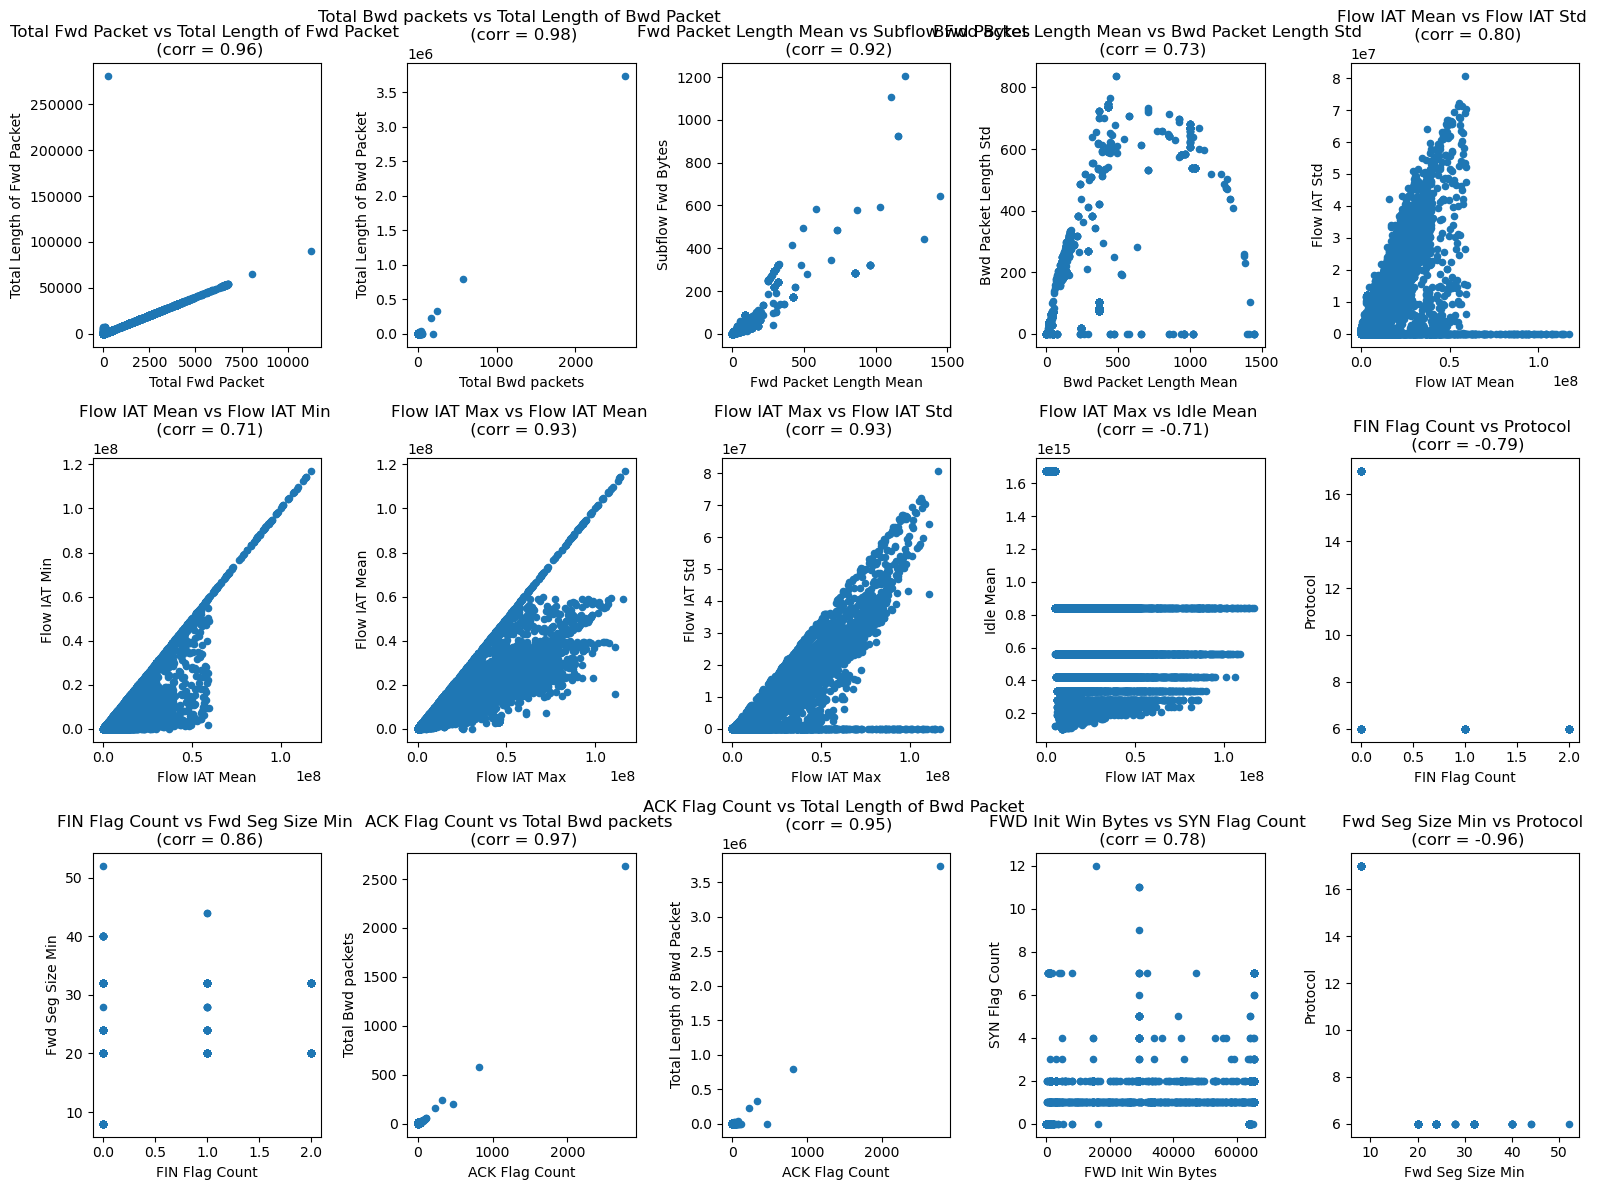

In [433]:
# grid dimensions
rows = (15 + 5 - 1) // 5 

# subplots
fig, axes = plt.subplots(rows, 5, figsize=(16, 4 * rows))
axes = axes.flatten()

# scatter plot
for i, row in enumerate(strong_cols_reduced.itertuples()):
    feature1 = row.Feature1
    feature2 = row.Feature2
    corr = row.Correlation

    dfnum.plot(kind='scatter', x=feature1, y=feature2, ax=axes[i])
    axes[i].set_title(f'{feature1} vs {feature2} \n (corr = {corr:.2f})')
    axes[i].set_xlabel(feature1)
    axes[i].set_ylabel(feature2)

plt.tight_layout()
plt.show()

Total Fwd Packet vs Total Length of Fwd Packet
strong positive correlation, indicating larger flows contain more packets
&emsp;

Total Bwd packets vs Total Length of Bwd Packet
strong positive correlation, showing consistent packet sizing in return traffic
&emsp;

Flow IAT Mean vs Flow IAT Min
moderate positive correlation, indicating flows with longer average gaps also have longer minimum gaps
&emsp;

Flow IAT Max vs Flow IAT Mean
strong positive correlation, indicating that flows with high peak delays also have elevated average delays
&emsp;

Flow IAT Max vs Flow IAT Std
strong positive correlation, showing that flows with high peak delays also have high timing variability
&emsp;

Flow IAT Mean vs Flow IAT Std
strong positive correlation, indicating that slower flows tend to have more variable timing
&emsp;

Fwd Packet Length Mean vs Subflow Fwd Bytes
strong positive correlation, showing consistent packet sizing patterns
&emsp;

Bwd Packet Length Mean vs Bwd Packet Length Std
strong positive correlation, indicating larger packets tend to have more size variability
&emsp;

Flow IAT Max vs Idle Mean
strong negative correlation, suggesting flows with high peak delays have shorter idle periods
&emsp;

FWD Init Win Bytes vs SYN Flag Count
strong positive correlation, indicating connection establishment patterns
&emsp;

FIN Flag Count vs Protocol
strong negative correlation, suggesting different connection termination patterns across protocols
&emsp;

FIN Flag Count vs Fwd Seg Size Min
strong positive correlation, indicating connection termination affects packet sizing
&emsp;

ACK Flag Count vs Total Bwd packets
strong positive correlation, reflecting TCP behavior
&emsp;

ACK Flag Count vs Total Length of Bwd Packet
strong positive correlation, reflecting traffic patterns
&emsp;

Fwd Seg Size Min vs Protocol
strong negative correlation, indicating distinct packet sizing across different protocols


In [434]:
greater_than_zero_counts = {}
total_rows = len(dfnum)
for column in dfnum.columns:
    if pd.api.types.is_numeric_dtype(dfnum[column]):
        count = (dfnum[column] > 0).sum()
        greater_than_zero_counts[column] = count
greater_than_zero_counts = pd.DataFrame(greater_than_zero_counts.items(), columns=['Feature', 'Value'])
zero_counts = greater_than_zero_counts[greater_than_zero_counts['Value'] < total_rows*.01]
greater_than_zero_counts = greater_than_zero_counts[greater_than_zero_counts['Value'] > total_rows*.01].sort_values(by='Value')
greater_than_zero_counts

drop_cols = zero_counts['Feature'].to_list()
drop_cols

#j's code (lists features with majority zero values)

['Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'URG Flag Count',
 'CWR Flag Count',
 'ECE Flag Count',
 'Fwd Bytes/Bulk Avg',
 'Fwd Packet/Bulk Avg',
 'Fwd Bulk Rate Avg',
 'Subflow Bwd Packets']

In [435]:
greater_than_zero_counts = {}
total_rows = len(strong_cols_reduced)
for column in strong_cols_reduced.columns:
    if pd.api.types.is_numeric_dtype(strong_cols_reduced[column]):
        count = (strong_cols_reduced[column] > 0).sum()
        greater_than_zero_counts[column] = count
greater_than_zero_counts = pd.DataFrame(greater_than_zero_counts.items(), columns=['Feature', 'Value'])
zero_counts = greater_than_zero_counts[greater_than_zero_counts['Value'] < total_rows*.01]
greater_than_zero_counts = greater_than_zero_counts[greater_than_zero_counts['Value'] > total_rows*.01].sort_values(by='Value')
greater_than_zero_counts

drop_cols = zero_counts['Feature'].to_list()
drop_cols

#new df dosent have any

[]

In [436]:
dfcat = Feb11.select_dtypes(include=['object'])
dfcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92440 entries, 0 to 92439
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Flow ID    92440 non-null  object
 1   Src IP     92440 non-null  object
 2   Dst IP     92440 non-null  object
 3   Timestamp  92440 non-null  object
 4   Label      92440 non-null  object
dtypes: object(5)
memory usage: 3.5+ MB


- Flow ID: drop, just a unique identifier
- Src IP: transform, country (Location)
- Dst IP: transform, country (Location)
- Timestamp: transform 
- Label: keep

In [437]:
import geoip2.database
from geopy.geocoders import Nominatim

reader = geoip2.database.Reader('/Users/sa2/Desktop/TKH/The-CyberChase/GeoLite2-City.mmdb')
# Build location info
locations = []
for ip in dfcat['Src IP']:
    try:
        response = reader.city(ip)
        country = response.country.name or "Unknown Country"
        location_str = f"{country}"
    except Exception as e:
        location_str = f"Error: {e}"
    locations.append(location_str)
# Add to DataFrame
dfcat['Src Location'] = locations

dfcat

,Flow ID,Src IP,Dst IP,Timestamp,Label,Src Location
0,38.60.47.125-10.1.0.4-27250-123-17,38.60.47.125,10.1.0.4,2023-02-11 00:00:04,ddospot,United States
1,208.115.243.59-10.1.0.4-43223-123-17,208.115.243.59,10.1.0.4,2023-02-11 00:00:07,ddospot,United States
2,208.115.243.59-10.1.0.4-43292-123-17,208.115.243.59,10.1.0.4,2023-02-11 00:00:43,ddospot,United States
3,45.144.152.58-10.1.0.4-37274-22-6,45.144.152.58,10.1.0.4,2023-02-11 00:00:57,cowrie,Italy
4,208.115.243.59-10.1.0.4-47362-123-17,208.115.243.59,10.1.0.4,2023-02-11 00:01:17,ddospot,United States
...,...,...,...,...,...,...
92435,195.20.241.216-10.1.0.4-5227-123-17,195.20.241.216,10.1.0.4,2023-02-11 23:59:27,ddospot,Germany
92436,195.20.241.216-10.1.0.4-42984-123-17,195.20.241.216,10.1.0.4,2023-02-11 23:59:27,ddospot,Germany
92437,73.135.195.148-10.1.0.4-20034-123-17,73.135.195.148,10.1.0.4,2023-02-11 23:59:27,ddospot,United States
92438,64.112.72.210-10.1.0.4-42933-23-6,64.112.72.210,10.1.0.4,2023-02-11 23:59:36,cowrie,United States


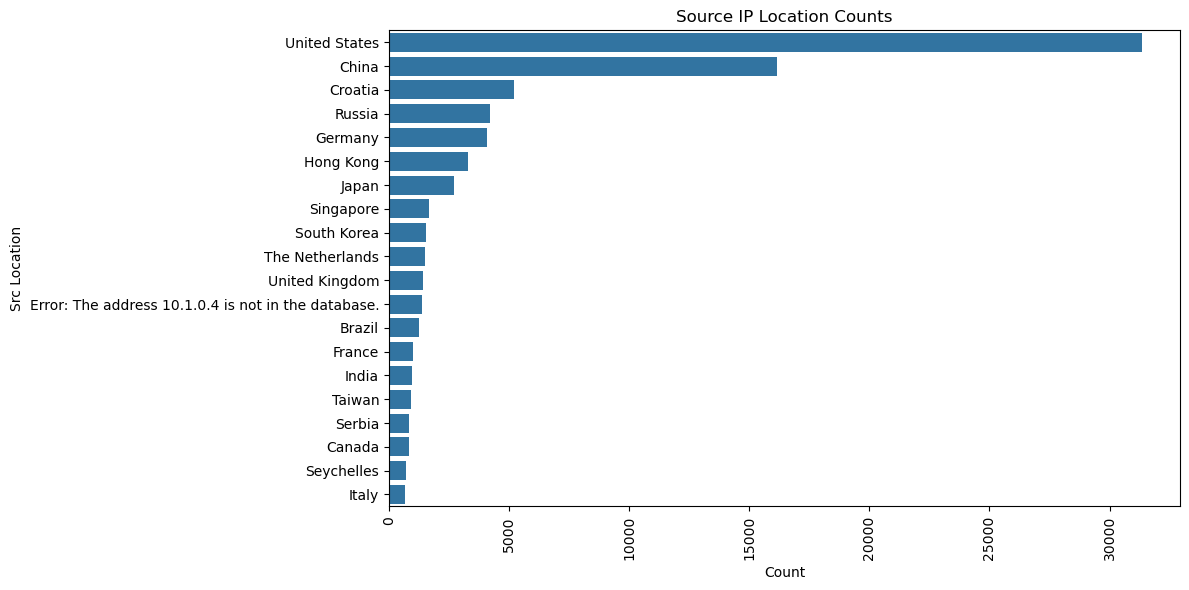

In [438]:
# Counts as DataFrame
location_counts = dfcat['Src Location'].value_counts().nlargest(20).reset_index()
location_counts.columns = ['Src Location', 'Count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=location_counts, y='Src Location', x='Count')
plt.xticks(rotation=90)
plt.title("Source IP Location Counts")
plt.tight_layout()
plt.show()

In [439]:
locations = []
for ip in dfcat['Dst IP']:
    try:
        response = reader.city(ip)
        country = response.country.name or "Unknown Country"
        location_str = f"{country}"
    except Exception as e:
        location_str = f"Error: {e}"
    locations.append(location_str)

dfcat['Dst Location'] = locations

dfcat

,Flow ID,Src IP,Dst IP,Timestamp,Label,Src Location,Dst Location
0,38.60.47.125-10.1.0.4-27250-123-17,38.60.47.125,10.1.0.4,2023-02-11 00:00:04,ddospot,United States,Error: The address 10.1.0.4 is not in the data...
1,208.115.243.59-10.1.0.4-43223-123-17,208.115.243.59,10.1.0.4,2023-02-11 00:00:07,ddospot,United States,Error: The address 10.1.0.4 is not in the data...
2,208.115.243.59-10.1.0.4-43292-123-17,208.115.243.59,10.1.0.4,2023-02-11 00:00:43,ddospot,United States,Error: The address 10.1.0.4 is not in the data...
3,45.144.152.58-10.1.0.4-37274-22-6,45.144.152.58,10.1.0.4,2023-02-11 00:00:57,cowrie,Italy,Error: The address 10.1.0.4 is not in the data...
4,208.115.243.59-10.1.0.4-47362-123-17,208.115.243.59,10.1.0.4,2023-02-11 00:01:17,ddospot,United States,Error: The address 10.1.0.4 is not in the data...
...,...,...,...,...,...,...,...
92435,195.20.241.216-10.1.0.4-5227-123-17,195.20.241.216,10.1.0.4,2023-02-11 23:59:27,ddospot,Germany,Error: The address 10.1.0.4 is not in the data...
92436,195.20.241.216-10.1.0.4-42984-123-17,195.20.241.216,10.1.0.4,2023-02-11 23:59:27,ddospot,Germany,Error: The address 10.1.0.4 is not in the data...
92437,73.135.195.148-10.1.0.4-20034-123-17,73.135.195.148,10.1.0.4,2023-02-11 23:59:27,ddospot,United States,Error: The address 10.1.0.4 is not in the data...
92438,64.112.72.210-10.1.0.4-42933-23-6,64.112.72.210,10.1.0.4,2023-02-11 23:59:36,cowrie,United States,Error: The address 10.1.0.4 is not in the data...


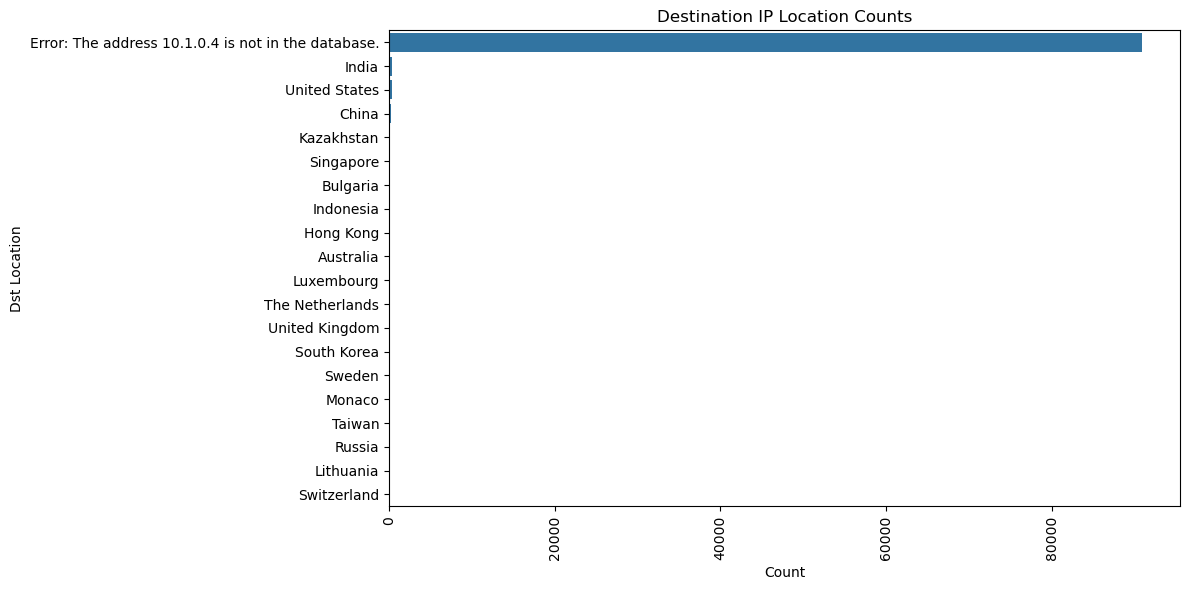

In [440]:
location_counts = dfcat['Dst Location'].value_counts().nlargest(20).reset_index()
location_counts.columns = ['Dst Location', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=location_counts, y='Dst Location', x='Count')
plt.xticks(rotation=90)
plt.title("Destination IP Location Counts")
plt.tight_layout()
plt.show()

Source IP top 20 countries bar chart:
the US and China dominate
&emsp;

Destination IP top 20 countries bar chart:
mostly Error, followed by India, the US, and China

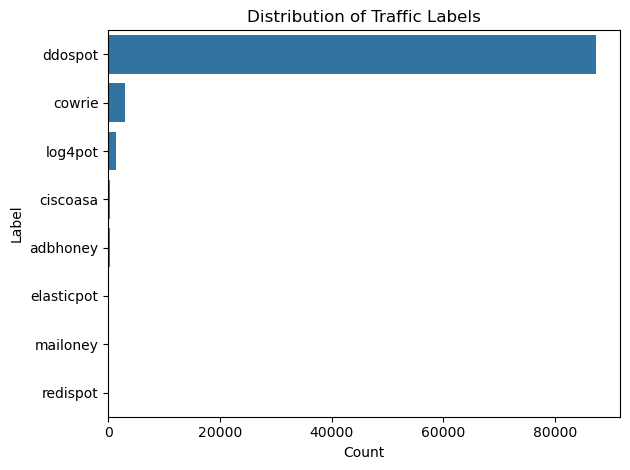

In [441]:
sns.countplot(data=dfcat, y='Label', order=dfcat['Label'].value_counts().index)
plt.title("Distribution of Traffic Labels")
plt.xlabel("Count")
plt.ylabel("Label")
plt.tight_layout()
plt.show()

majority ddospot

In [442]:
dfcat['Timestamp'] = pd.to_datetime(dfcat['Timestamp'])
dfcat['Hour'] = dfcat['Timestamp'].dt.hour
dfcat['DayOfWeek'] = dfcat['Timestamp'].dt.dayofweek
dfcat['IsWeekend'] = dfcat['DayOfWeek'].isin([5,6])

#cant really use this for one day of eda but for when csvs are merged

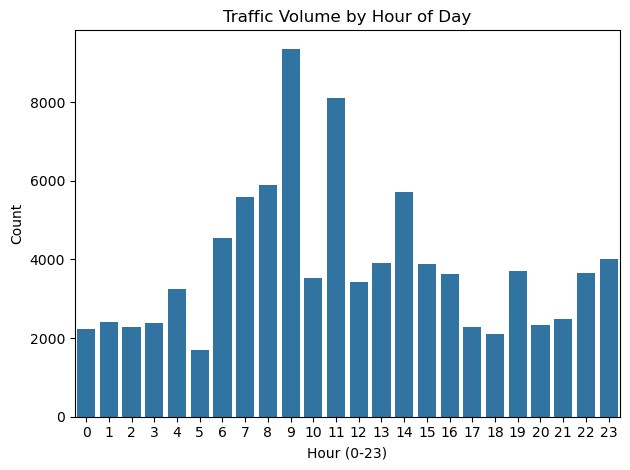

In [443]:
sns.countplot(data=dfcat, x='Hour')
plt.title("Traffic Volume by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


8-12 peak, highest spike at 10

In [444]:
object_reduced = dfcat.drop(columns=['Dst IP', 'Flow ID', 'Src IP'])
object_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92440 entries, 0 to 92439
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     92440 non-null  datetime64[ns]
 1   Label         92440 non-null  object        
 2   Src Location  92440 non-null  object        
 3   Dst Location  92440 non-null  object        
 4   Hour          92440 non-null  int32         
 5   DayOfWeek     92440 non-null  int32         
 6   IsWeekend     92440 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int32(2), object(3)
memory usage: 3.6+ MB


In [446]:
# First create the reduced dataframe
strong_cols_reduced = strong_cols.drop(columns=[
    'Fwd IAT Total', 'Fwd Header Length', 'Fwd Act Data Pkts', 
    'Bwd Packet/Bulk Avg', 'Fwd Packets/s', 'Fwd IAT Std', 
    'Fwd IAT Max', 'Fwd IAT Min', 'Bwd Header Length', 
    'Average Packet Size', 'Fwd Packet Length Min', 
    'Bwd Packet Length Min', 'Packet Length Mean', 
    'Packet Length Std', 'Packet Length Min', 
    'Fwd IAT Mean', 'Bwd IAT Mean', 'Bwd IAT Std', 
    'Bwd IAT Max', 'Bwd IAT Min', 'Active Max', 
    'Active Std', 'Idle Std', 'Idle Min', 
    'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 
    'Bwd Bytes/Bulk Avg', 'Packet Length Variance', 
    'Subflow Fwd Packets', 'Active Min', 
    'Packet Length Max', 'Bwd IAT Total', 
    'Bwd Packet Length Max', 'Fwd Packet Length Max'
])

# Then concatenate
final_df = pd.concat([object_reduced, strong_cols_reduced], axis=1)

In [447]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92440 entries, 0 to 92439
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Timestamp                   92440 non-null  datetime64[ns]
 1   Label                       92440 non-null  object        
 2   Src Location                92440 non-null  object        
 3   Dst Location                92440 non-null  object        
 4   Hour                        92440 non-null  int32         
 5   DayOfWeek                   92440 non-null  int32         
 6   IsWeekend                   92440 non-null  bool          
 7   Protocol                    92440 non-null  int64         
 8   Flow Duration               92440 non-null  int64         
 9   Total Fwd Packet            92440 non-null  int64         
 10  Total Bwd packets           92440 non-null  int64         
 11  Total Length of Fwd Packet  92440 non-null  float64   